## Student Performance Exploratory Data Analysis
**Authors:** Nick Romano and Trevor McCormick  
**Version 1.0**  
**Spring 2022 DS160-01: Introduction to Data Science**  


---

The data used for this notebook is from the Student Performance dataset in the UCI Machine Learning Repository. Link: <a href="https://archive-beta.ics.uci.edu/ml/datasets/student+performance?">Link to Dataset</a>

**Citation:**  
Cortez, Paulo. (2014). Student Performance. UCI Machine Learning Repository.
   
   
---

### Reading and Merging Datasets

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_math = pd.read_csv('student-mat.csv', sep=';')
df_portuguese = pd.read_csv('student-por.csv', sep=';')

In [5]:
df_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [6]:
df_math.insert(0, "subject", "Mathematics")

In [7]:
df_portuguese

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [8]:
df_portuguese.insert(0, "subject", "Portuguese")

In [9]:
df_math.columns

Index(['subject', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
df_math.dtypes

subject       object
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [11]:
df_portuguese.columns

Index(['subject', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [12]:
df_portuguese.dtypes

subject       object
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [13]:
#Checking to see if the columns and dtypes are the same, so that we can merge the two data sets
column_check = df_math.columns == df_portuguese.columns
dtypes_check = df_math.dtypes == df_portuguese.dtypes

print(f"Same Columns: {all(column_check)}")
print(f"Same dtypes: {all(dtypes_check)}")

Same Columns: True
Same dtypes: True


In [14]:
df = pd.DataFrame().append([df_math, df_portuguese], ignore_index=True)

### Processing and Cleaning Dataframe

In [15]:
df

,subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,Mathematics,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,Mathematics,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,Mathematics,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,Mathematics,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,Mathematics,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,Portuguese,MS,F,19,R,GT3,T,2,3,services,...,5,4,2,1,2,5,4,10,11,10
1040,Portuguese,MS,F,18,U,LE3,T,3,1,teacher,...,4,3,4,1,1,1,4,15,15,16
1041,Portuguese,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,1,5,6,11,12,9
1042,Portuguese,MS,M,17,U,LE3,T,3,1,services,...,2,4,5,3,4,2,6,10,10,10


On the student.txt file that came along with the data, it explains that there are 382 students that are included in both datasets that we merged. We decided to drop the duplicated copy of the student and just focus on the unique set of students in the dataset.

In [16]:
df.drop_duplicates(["school","sex","age","address","famsize","Pstatus",
                    "Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], 
                   ignore_index=True, inplace=True)

In [17]:
df

,subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,Mathematics,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,Mathematics,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,Mathematics,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,Mathematics,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,Mathematics,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,Portuguese,MS,F,19,R,GT3,A,1,1,at_home,...,3,5,4,1,4,1,0,8,0,0
658,Portuguese,MS,F,18,R,GT3,T,2,2,services,...,4,2,1,1,1,4,5,14,14,15
659,Portuguese,MS,F,18,R,LE3,A,1,2,at_home,...,4,3,4,1,4,5,0,16,15,15
660,Portuguese,MS,F,19,R,GT3,T,1,1,at_home,...,4,3,3,1,1,3,4,7,8,9


In [18]:
school_names = {"GP":"Gabriel Pereira",
                "MS":"Mousinho da Silveira"}

def school_conversion(x):
    return school_names.get(x)

df.school = df.school.map(school_conversion)

In [19]:
address_types = {"U":"Urban",
                 "R":"Rural"}

def address_conversion(x):
    return address_types.get(x)

df.address = df.address.map(address_conversion)

In [20]:
Pstatus_types = {"A":"Living Apart",
                 "T":"Living Together"}

def pstatus_conversion(x):
    return Pstatus_types.get(x)

df.Pstatus = df.Pstatus.map(pstatus_conversion)

In [21]:
df.columns

Index(['subject', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Dropped a few columns from the data set that we felt wasn't as necessary as some of the other columns. Also renamed a few columns that we kept for some clarity when working with the data.

In [22]:
df.drop(columns=["Mjob", "Fjob", "guardian", "romantic", "nursery", "famsize", "reason"], axis=1, inplace=True)

In [23]:
df.rename({"Medu":"M_edu", "Fedu":"F_edu", "Dalc":"weekday_alc", "Walc":"weekend_alc", 
           "G1":"period1_grade", "G2":"period2_grade", "G3":"final_grade"}, axis=1, inplace=True)

In [24]:
df.columns

Index(['subject', 'school', 'sex', 'age', 'address', 'Pstatus', 'M_edu',
       'F_edu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'higher', 'internet', 'famrel', 'freetime',
       'goout', 'weekday_alc', 'weekend_alc', 'health', 'absences',
       'period1_grade', 'period2_grade', 'final_grade'],
      dtype='object')

### Dataset Description

In [25]:
df

,subject,school,sex,age,address,Pstatus,M_edu,F_edu,traveltime,studytime,...,famrel,freetime,goout,weekday_alc,weekend_alc,health,absences,period1_grade,period2_grade,final_grade
0,Mathematics,Gabriel Pereira,F,18,Urban,Living Apart,4,4,2,2,...,4,3,4,1,1,3,6,5,6,6
1,Mathematics,Gabriel Pereira,F,17,Urban,Living Together,1,1,1,2,...,5,3,3,1,1,3,4,5,5,6
2,Mathematics,Gabriel Pereira,F,15,Urban,Living Together,1,1,1,2,...,4,3,2,2,3,3,10,7,8,10
3,Mathematics,Gabriel Pereira,F,15,Urban,Living Together,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,Mathematics,Gabriel Pereira,F,16,Urban,Living Together,3,3,1,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,Portuguese,Mousinho da Silveira,F,19,Rural,Living Apart,1,1,2,2,...,3,5,4,1,4,1,0,8,0,0
658,Portuguese,Mousinho da Silveira,F,18,Rural,Living Together,2,2,2,3,...,4,2,1,1,1,4,5,14,14,15
659,Portuguese,Mousinho da Silveira,F,18,Rural,Living Apart,1,2,3,2,...,4,3,4,1,4,5,0,16,15,15
660,Portuguese,Mousinho da Silveira,F,19,Rural,Living Together,1,1,2,2,...,4,3,3,1,1,3,4,7,8,9


In [26]:
df.shape

(662, 27)

Creating a function to check for missing values for a given column, then using a for loop to return the missing values for each of the columns

In [27]:
def missing_values(column):
    na_values = df[column].isna().sum()
    return na_values

In [28]:
for i in df.columns:
    print(f"Column name: {i}")
    print(f"Missing values: {missing_values(i)}")
    print(f"Total value count: {df[i].count()}")
    print(f"Missing value percentage: {missing_values(i)/df[i].count()}% \n" )

Column name: subject
Missing values: 0
Total value count: 662
Missing value percentage: 0.0% 

Column name: school
Missing values: 0
Total value count: 662
Missing value percentage: 0.0% 

Column name: sex
Missing values: 0
Total value count: 662
Missing value percentage: 0.0% 

Column name: age
Missing values: 0
Total value count: 662
Missing value percentage: 0.0% 

Column name: address
Missing values: 0
Total value count: 662
Missing value percentage: 0.0% 

Column name: Pstatus
Missing values: 0
Total value count: 662
Missing value percentage: 0.0% 

Column name: M_edu
Missing values: 0
Total value count: 662
Missing value percentage: 0.0% 

Column name: F_edu
Missing values: 0
Total value count: 662
Missing value percentage: 0.0% 

Column name: traveltime
Missing values: 0
Total value count: 662
Missing value percentage: 0.0% 

Column name: studytime
Missing values: 0
Total value count: 662
Missing value percentage: 0.0% 

Column name: failures
Missing values: 0
Total value count:

**Column data types and missing data**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   subject        662 non-null    object
 1   school         662 non-null    object
 2   sex            662 non-null    object
 3   age            662 non-null    int64 
 4   address        662 non-null    object
 5   Pstatus        662 non-null    object
 6   M_edu          662 non-null    int64 
 7   F_edu          662 non-null    int64 
 8   traveltime     662 non-null    int64 
 9   studytime      662 non-null    int64 
 10  failures       662 non-null    int64 
 11  schoolsup      662 non-null    object
 12  famsup         662 non-null    object
 13  paid           662 non-null    object
 14  activities     662 non-null    object
 15  higher         662 non-null    object
 16  internet       662 non-null    object
 17  famrel         662 non-null    int64 
 18  freetime       662 non-null   

### Summary Statistics 

**Summary statistics of the continuous data within the dataset.**

In [30]:
continuous_columns = df[["age", "failures", "absences", "period1_grade", "period2_grade", "final_grade"]]
continuous_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
age,662.0,16.812689,1.269194,15.0,16.0,17.0,18.0,22.0
failures,662.0,0.332326,0.716024,0.0,0.0,0.0,0.0,3.0
absences,662.0,4.930514,6.858060,0.0,0.0,3.0,8.0,75.0
period1_grade,662.0,10.728097,3.082098,3.0,8.0,10.0,13.0,19.0
period2_grade,662.0,10.708459,3.529588,0.0,9.0,11.0,13.0,19.0
final_grade,662.0,10.725076,4.106738,0.0,9.0,11.0,13.0,20.0


In [31]:
continuous_columns.corr()

,age,failures,absences,period1_grade,period2_grade,final_grade
age,1.000000,0.280021,0.168313,-0.113206,-0.130408,-0.127446
failures,0.280021,1.000000,0.087584,-0.368938,-0.360881,-0.359377
absences,0.168313,0.087584,1.000000,-0.050925,-0.042650,-0.004601
period1_grade,-0.113206,-0.368938,-0.050925,1.000000,0.841436,0.796569
period2_grade,-0.130408,-0.360881,-0.042650,0.841436,1.000000,0.913548
final_grade,-0.127446,-0.359377,-0.004601,0.796569,0.913548,1.000000


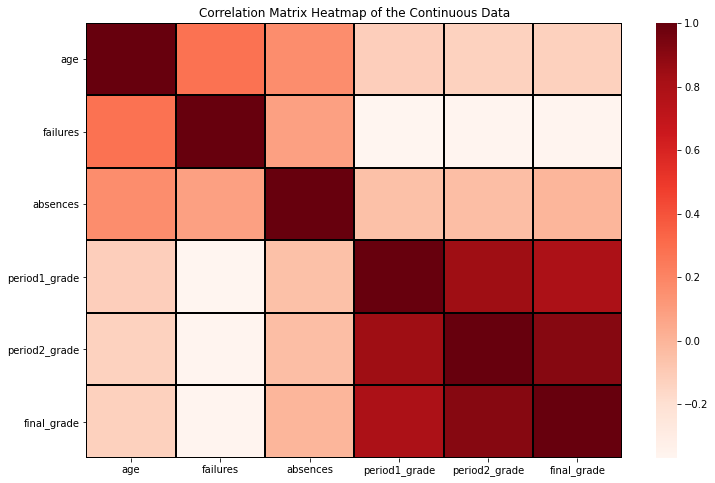

In [32]:
figure1 = plt.figure(figsize = (12,8))
sns.heatmap(continuous_columns.corr(), cmap='Reds', linewidths=1, linecolor='black')
plt.title('Correlation Matrix Heatmap of the Continuous Data')
plt.yticks(rotation=0)
plt.savefig('correlation_matrix.png', bbox_inches='tight')

**Value frequency and proportions of the categorical data.**

In [33]:
def value_frequency(column):
    frequency = df[column].value_counts().sort_index()
    return frequency

def value_proportions(column):
    proportions = df[column].value_counts(normalize=True).sort_index()
    return proportions

In [34]:
categorical_columns = df[["subject", "school", "sex", "address", "Pstatus", "M_edu", "F_edu", 
                            "traveltime", "studytime", "schoolsup", "famsup", "paid",
                            "activities", "higher", "internet", "famrel", "freetime", "goout",
                            "weekday_alc", "weekend_alc", "health"]]

for i in categorical_columns:
    print(f"Column name: {i}")
    print(f"Number of values: {df[i].count()} \n")
    print("Value_frequencies")
    print(f"{value_frequency(i)} \n")
    print("Value_proportions")
    print(f"{value_proportions(i)} \n")
    print("-------------------------------")

Column name: subject
Number of values: 662 

Value_frequencies
Mathematics    391
Portuguese     271
Name: subject, dtype: int64 

Value_proportions
Mathematics    0.590634
Portuguese     0.409366
Name: subject, dtype: float64 

-------------------------------
Column name: school
Number of values: 662 

Value_frequencies
Gabriel Pereira         434
Mousinho da Silveira    228
Name: school, dtype: int64 

Value_proportions
Gabriel Pereira         0.655589
Mousinho da Silveira    0.344411
Name: school, dtype: float64 

-------------------------------
Column name: sex
Number of values: 662 

Value_frequencies
F    390
M    272
Name: sex, dtype: int64 

Value_proportions
F    0.589124
M    0.410876
Name: sex, dtype: float64 

-------------------------------
Column name: address
Number of values: 662 

Value_frequencies
Rural    201
Urban    461
Name: address, dtype: int64 

Value_proportions
Rural    0.303625
Urban    0.696375
Name: address, dtype: float64 

-------------------------------

### Data Set Graphical Exploration

#### Distributions

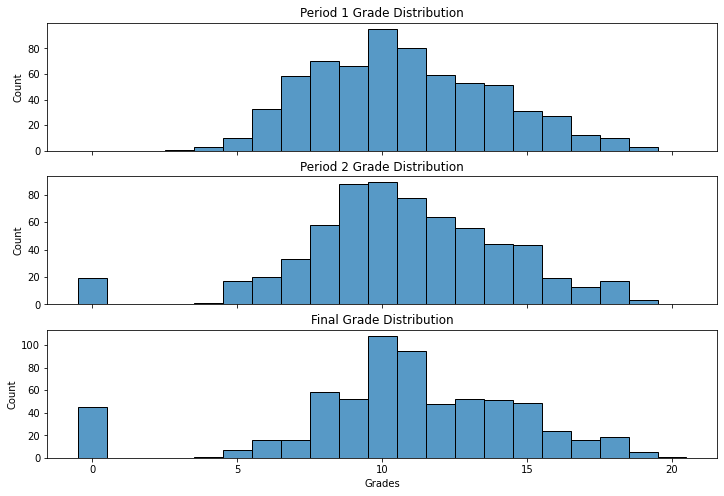

In [35]:
figure2, axes = plt.subplots(3,1, figsize=(12,8), sharex=True)
sns.histplot(data=df, x="period1_grade", ax=axes[0], discrete=True).set(title="Period 1 Grade Distribution")
sns.histplot(data=df, x="period2_grade", ax=axes[1], discrete=True).set(title="Period 2 Grade Distribution")
sns.histplot(data=df, x="final_grade", ax=axes[2], discrete=True).set(title="Final Grade Distribution", xlabel="Grades")
figure2.savefig("grade_distributions.png", bbox_inches='tight')

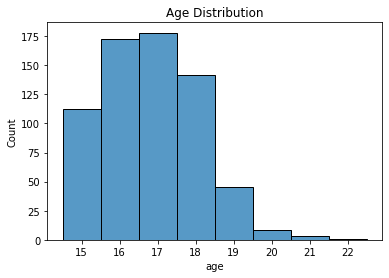

In [36]:
figure3 = sns.histplot(data=df, x='age', discrete=True)
plt.title("Age Distribution")
plt.savefig("age_distributions.png", bbox_inches='tight')

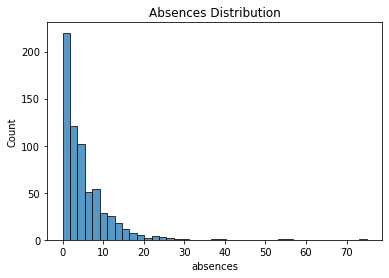

In [37]:
figure4 = sns.histplot(data=df, x='absences')
plt.title("Absences Distribution")
plt.savefig("absences_distributions.png", bbox_inches='tight')

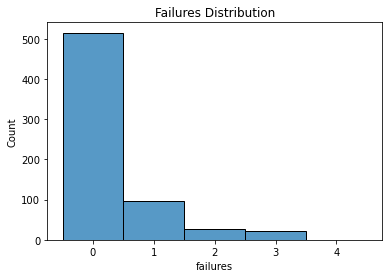

In [38]:
figure5 = sns.histplot(data=df, x='failures', binrange=(0,4), discrete=True).set(title="Failures Distribution")
plt.savefig("failure_distributions.png", bbox_inches='tight')

#### Scatterplots

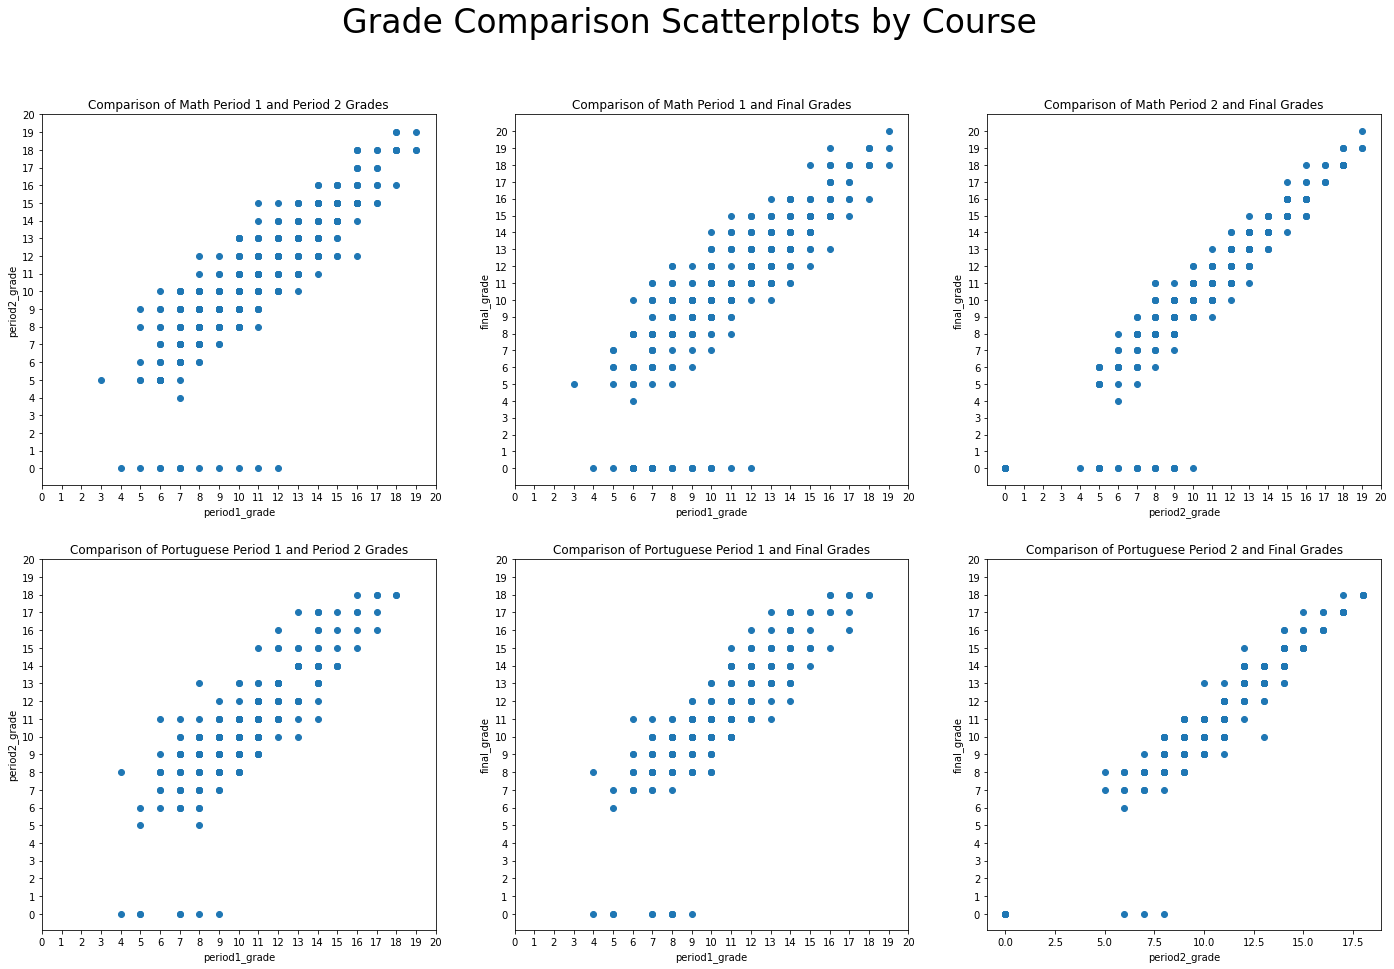

In [65]:
m = df.query('subject == "Mathematics"')
p = df.query('subject == "Portuguese"')

figure6 = plt.figure(figsize=(24, 15))
figure6.suptitle("Grade Comparison Scatterplots by Course", fontsize=33)

figure6.add_subplot(231)
plt.scatter(m.period1_grade, m.period2_grade)
plt.title("Comparison of Math Period 1 and Period 2 Grades")
plt.xlabel("period1_grade")
plt.xticks(np.arange(0,21))
plt.ylabel("period2_grade")
plt.yticks(np.arange(0,21))

figure6.add_subplot(232)
plt.scatter(m.period1_grade, m.final_grade)
plt.title("Comparison of Math Period 1 and Final Grades")
plt.xlabel("period1_grade")
plt.xticks(np.arange(0,21))
plt.ylabel("final_grade")
plt.yticks(np.arange(0,21))

figure6.add_subplot(233)
plt.scatter(m.period2_grade, m.final_grade)
plt.title("Comparison of Math Period 2 and Final Grades")
plt.xlabel("period2_grade")
plt.xticks(np.arange(0,21))
plt.ylabel("final_grade")
plt.yticks(np.arange(0,21))

figure6.add_subplot(234)
plt.scatter(p.period1_grade, p.period2_grade)
plt.title("Comparison of Portuguese Period 1 and Period 2 Grades")
plt.xlabel("period1_grade")
plt.xticks(np.arange(0,21))
plt.ylabel("period2_grade")
plt.yticks(np.arange(0,21))

figure6.add_subplot(235)
plt.scatter(p.period1_grade, p.final_grade)
plt.title("Comparison of Portuguese Period 1 and Final Grades")
plt.xlabel("period1_grade")
plt.xticks(np.arange(0,21))
plt.ylabel("final_grade")
plt.yticks(np.arange(0,21))

figure6.add_subplot(236)
plt.scatter(p.period2_grade, p.final_grade)
plt.title("Comparison of Portuguese Period 2 and Final Grades")
plt.xlabel("period2_grade")
plt.ylabel("final_grade")
plt.yticks(np.arange(0,21))

plt.savefig("grade_scatterplot.png", bbox_inches='tight')

#### Bar Charts and Boxplots

In [44]:
def graphs(dataframe, df_category, sort, y1, y2, y3, size, overall_title, overall_title_size, x_label, y_label, subplot1_title, 
           subplot2_title, subplot3_title, subplot4_title, savename):
    figure7 = plt.figure(figsize= size)
    plt.suptitle(overall_title, fontsize=overall_title_size)
    
    figure7.add_subplot(141)
    df[df_category].value_counts().sort_index(ascending = sort).plot(kind='bar') #sort is used to make sure that the nominal/oridnal categories are the same on the x-axis
    plt.title(subplot1_title)
    plt.xlabel(x_label)
    plt.xticks(rotation=0)
    plt.ylabel(y_label)
    plt.grid(True)
    
    figure7.add_subplot(142)
    plt.title(subplot2_title)
    sns.boxplot(x=df_category, y=y1, data=dataframe)
    plt.xlabel(x_label)
    plt.yticks(np.arange(0,21))
    
    figure7.add_subplot(143)
    plt.title(subplot3_title)
    sns.boxplot(x=df_category, y=y2, data=dataframe)
    plt.xlabel(x_label)
    plt.yticks(np.arange(0,21))

    figure7.add_subplot(144)
    plt.title(subplot4_title)
    sns.boxplot(x=df_category, y=y3, data=dataframe)
    plt.xlabel(x_label)
    plt.yticks(np.arange(0,21))
    
    plt.savefig(f"{savename}.png", bbox_inches='tight')
    
    return figure7

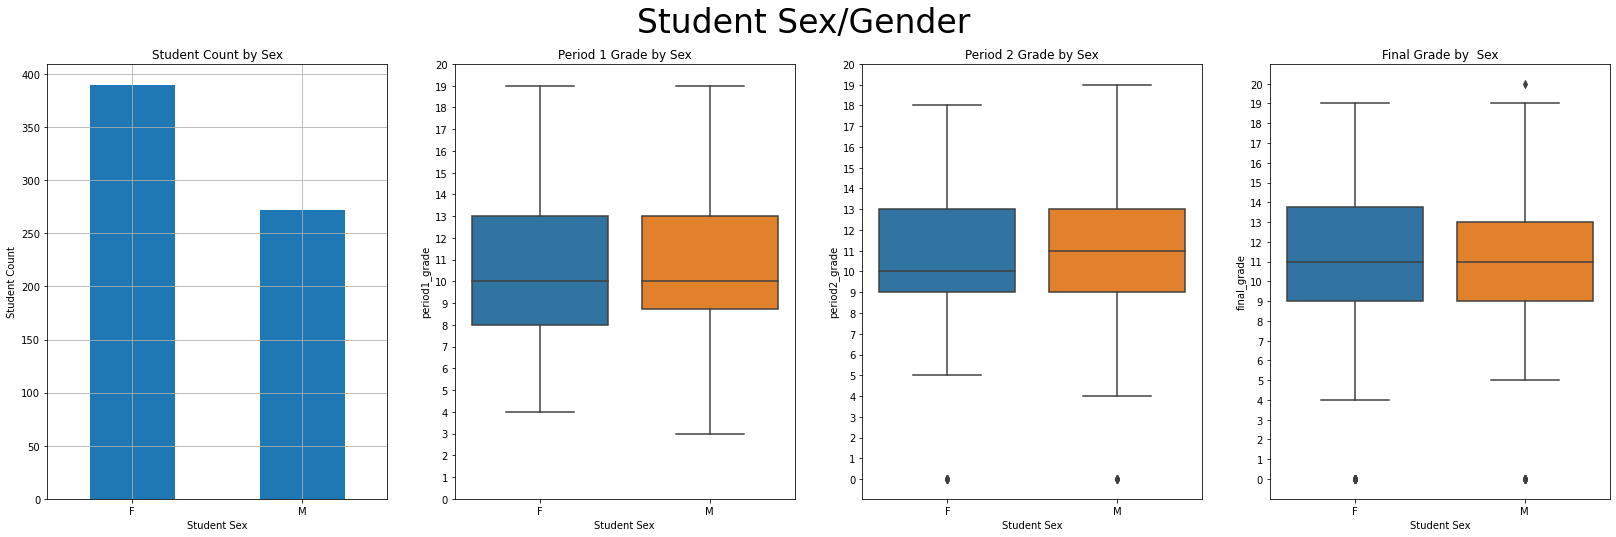

In [45]:
student_sex= graphs(df, "sex", True, "period1_grade", "period2_grade", "final_grade", (28, 8), "Student Sex/Gender", 33, "Student Sex", "Student Count", 
       "Student Count by Sex", "Period 1 Grade by Sex", "Period 2 Grade by Sex", "Final Grade by  Sex", "student_sex")

---

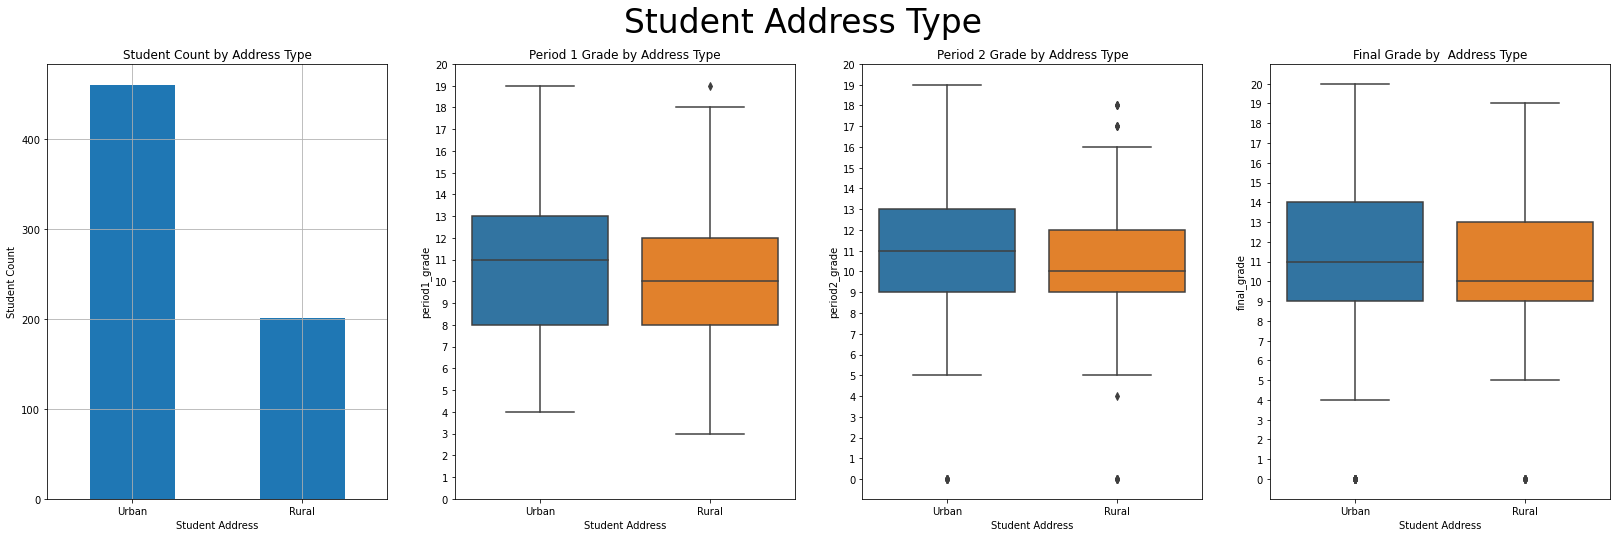

In [67]:
student_address = graphs(df, "address", False, "period1_grade", "period2_grade", "final_grade", (28, 8), "Student Address Type", 33, "Student Address", "Student Count", 
                         "Student Count by Address Type", "Period 1 Grade by Address Type", "Period 2 Grade by Address Type", 
                         "Final Grade by  Address Type", "student_address_type")

---

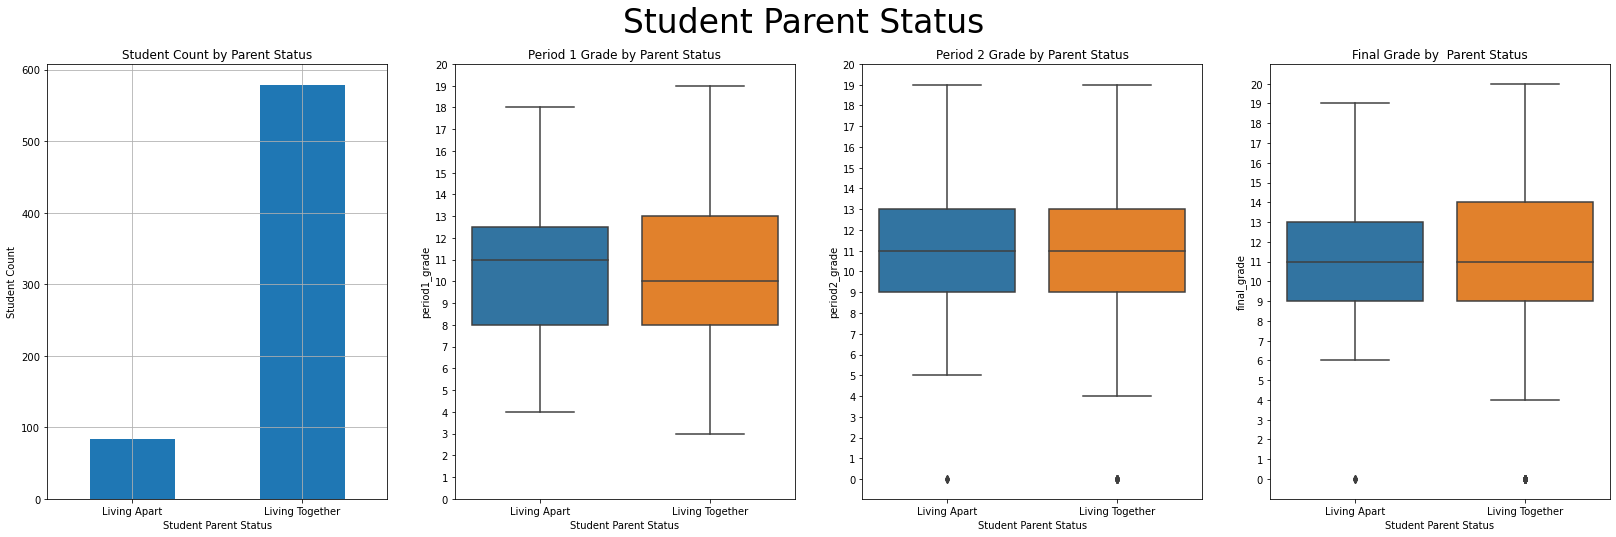

In [47]:
student_parent_status = graphs(df, "Pstatus", True, "period1_grade", "period2_grade", "final_grade", (28, 8), "Student Parent Status", 33, "Student Parent Status", 
                               "Student Count", "Student Count by Parent Status", "Period 1 Grade by Parent Status", "Period 2 Grade by Parent Status", 
                               "Final Grade by  Parent Status", "student_parentstatus")

---
**The mother education level variable is an ordinal varaiable. From the student.txt files the numeric values represent:**   
0 = none       
1 = primary education (4th grade)  
2 = 5th to 9th grade   
3 = secondary education  
4 = higher education

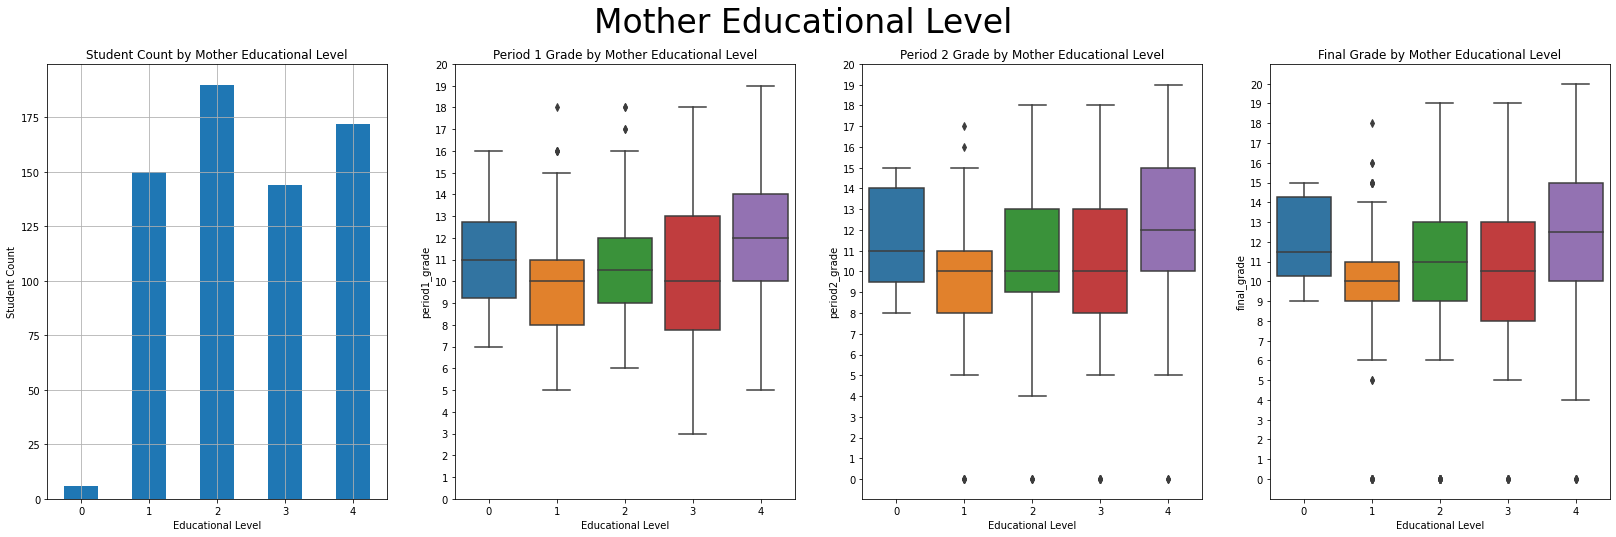

In [48]:
mother_edu_level = graphs(df, "M_edu", True, "period1_grade", "period2_grade", "final_grade", (28, 8), "Mother Educational Level", 33, "Educational Level", "Student Count", 
                          "Student Count by Mother Educational Level", "Period 1 Grade by Mother Educational Level", "Period 2 Grade by Mother Educational Level", 
                          "Final Grade by Mother Educational Level", "m_education")

---
**The father education level variable is an ordinal varaiable. From the student.txt files the numeric values represent:**   
0 = none       
1 = primary education (4th grade)  
2 = 5th to 9th grade   
3 = secondary education  
4 = higher education  

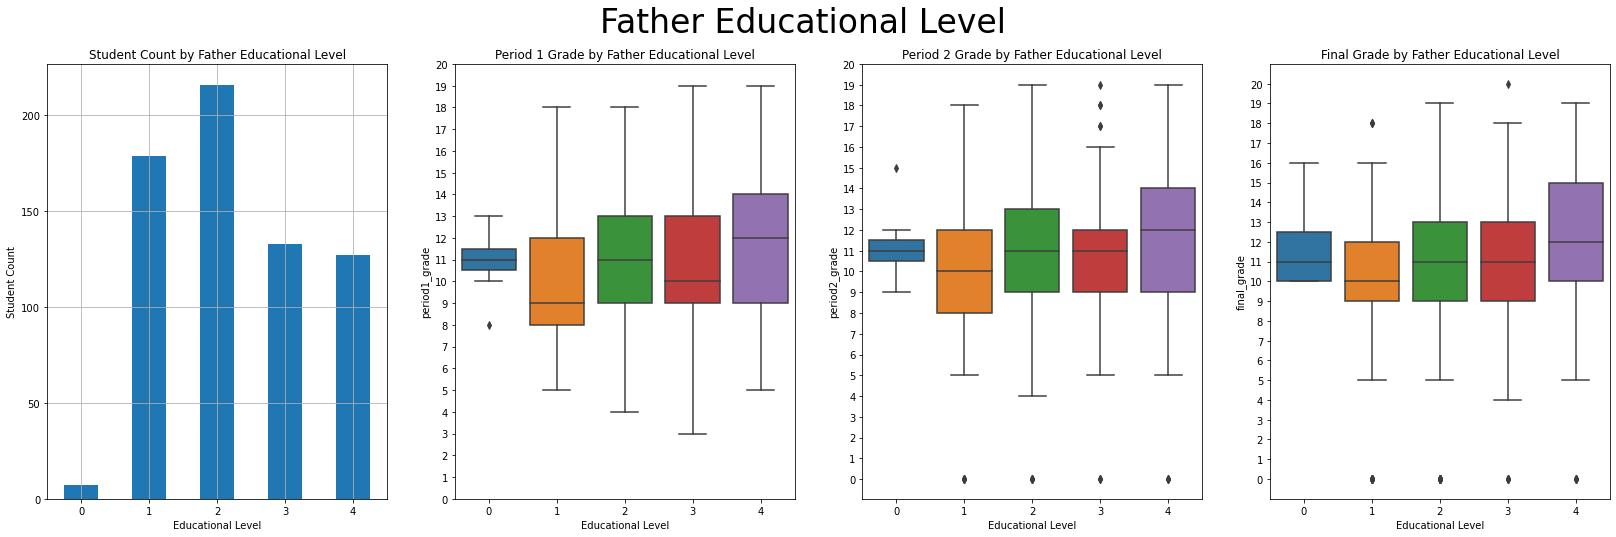

In [49]:
father_edu_level = graphs(df, "F_edu", True, "period1_grade", "period2_grade", "final_grade", (28, 8), "Father Educational Level", 33, "Educational Level", "Student Count", 
                          "Student Count by Father Educational Level", "Period 1 Grade by Father Educational Level", "Period 2 Grade by Father Educational Level", 
                          "Final Grade by Father Educational Level", "f_education")

---
**The traveltime variable is an ordinal varaiable that ranks students based on how long they have to travel to School. 
From the student.txt files the numeric values represent:**   
1 = Less than 15 min  
2 = 15 to 30 min    
3 = 30 min. to 1 hour    
4 = Greater than 1 hour    

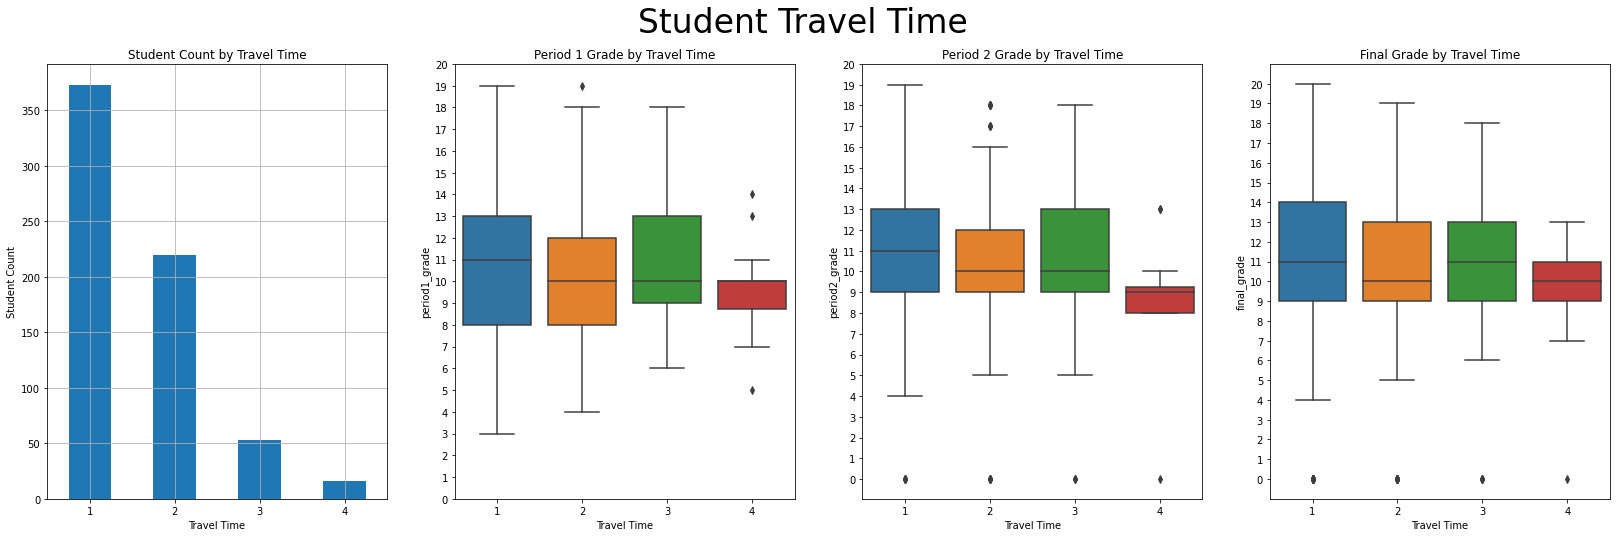

In [50]:
student_traveltime = graphs(df, "traveltime", True, "period1_grade", "period2_grade", "final_grade", (28, 8), "Student Travel Time", 33, "Travel Time", "Student Count", 
                            "Student Count by Travel Time", "Period 1 Grade by Travel Time", "Period 2 Grade by Travel Time", "Final Grade by Travel Time", "student_traveltime")

---
**The traveltime variable is an ordinal varaiable that ranks students based on how long they spend time studying for School in a week. 
From the student.txt files the numeric values represent:**   
1 = <2 hours  
2 = 2 to 5 hours   
3 = 5 to 10 hours  
4 = >10 hours  

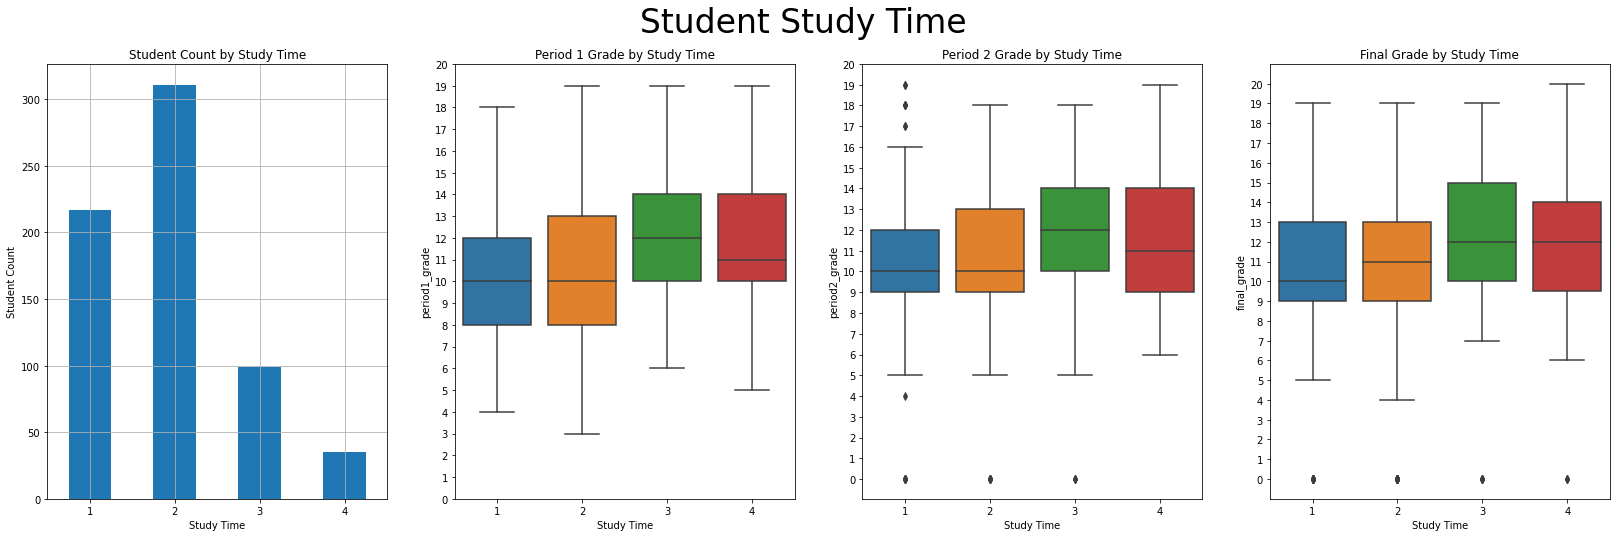

In [51]:
student_studytime = graphs(df, "studytime", True, "period1_grade", "period2_grade", "final_grade", (28, 8), "Student Study Time", 33, "Study Time", "Student Count", 
                           "Student Count by Study Time", "Period 1 Grade by Study Time", "Period 2 Grade by Study Time", "Final Grade by Study Time", "student_studytime")

---

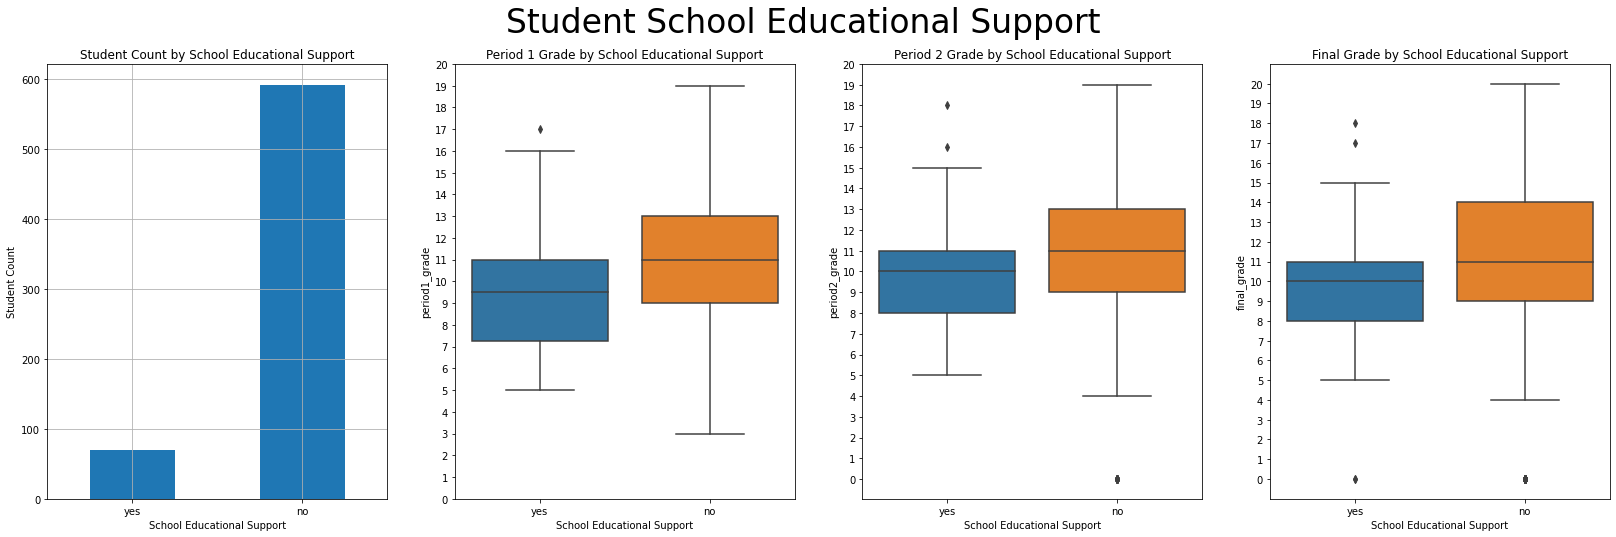

In [52]:
school_support = graphs(df, "schoolsup", False, "period1_grade", "period2_grade", "final_grade", (28, 8), "Student School Educational Support", 33, 
                        "School Educational Support", "Student Count", "Student Count by School Educational Support", 
                        "Period 1 Grade by School Educational Support", "Period 2 Grade by School Educational Support", 
                        "Final Grade by School Educational Support", "student_schoolsupport")

---

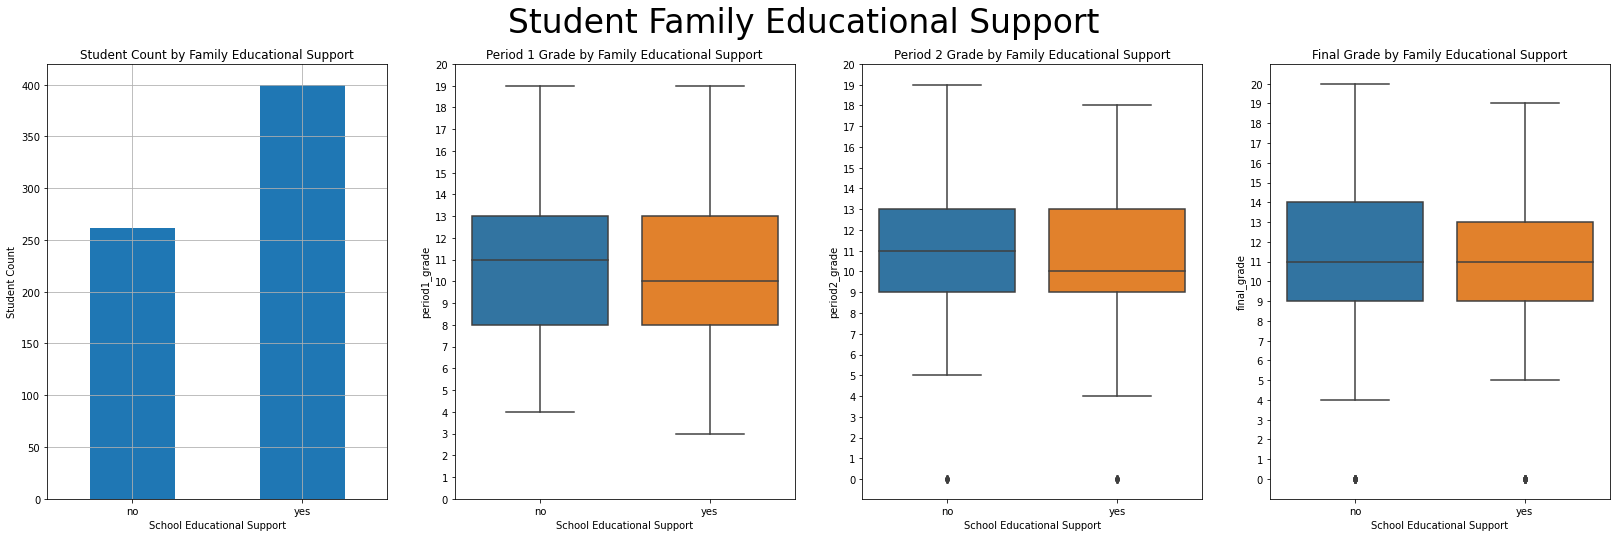

In [53]:
family_support = graphs(df, "famsup", True, "period1_grade", "period2_grade", "final_grade", (28, 8), "Student Family Educational Support", 33, 
                        "School Educational Support", "Student Count", "Student Count by Family Educational Support", "Period 1 Grade by Family Educational Support", 
                        "Period 2 Grade by Family Educational Support", "Final Grade by Family Educational Support", "student_familysupport")

---

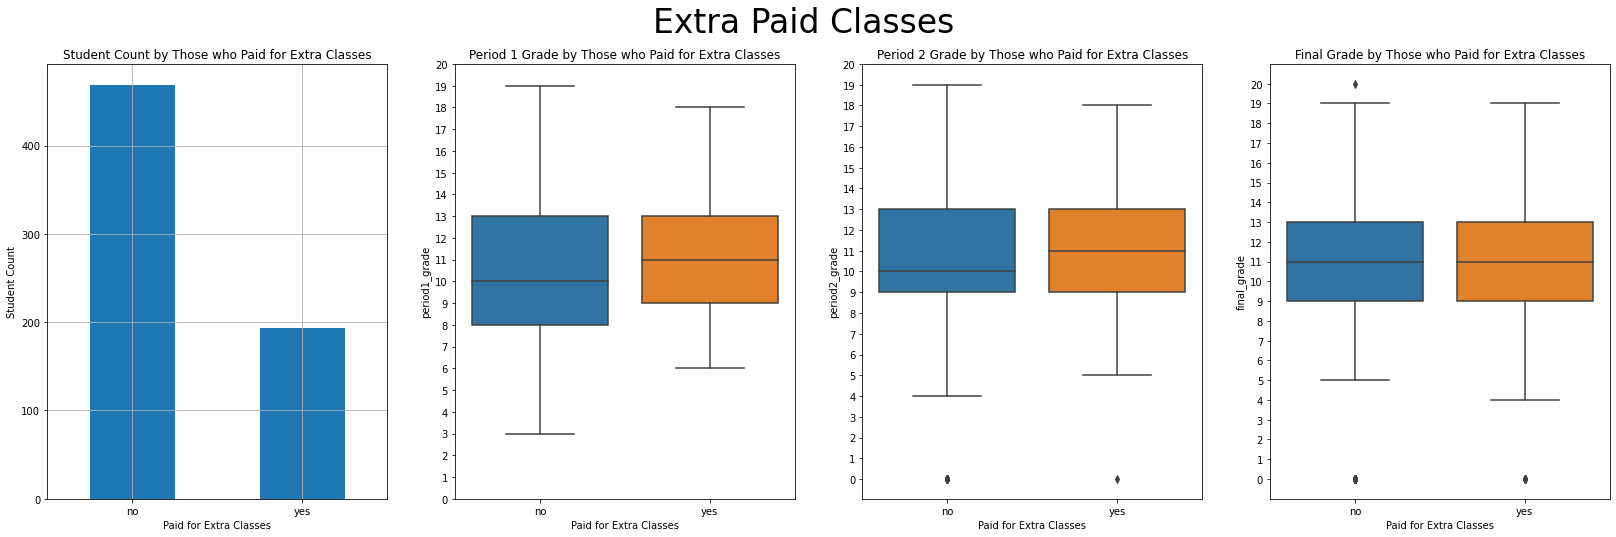

In [54]:
extra_classes = graphs(df, "paid", True, "period1_grade", "period2_grade", "final_grade", (28, 8), "Extra Paid Classes", 33, "Paid for Extra Classes", "Student Count", 
                       "Student Count by Those who Paid for Extra Classes", "Period 1 Grade by Those who Paid for Extra Classes", 
                       "Period 2 Grade by Those who Paid for Extra Classes", "Final Grade by Those who Paid for Extra Classes", "student_paid")

---

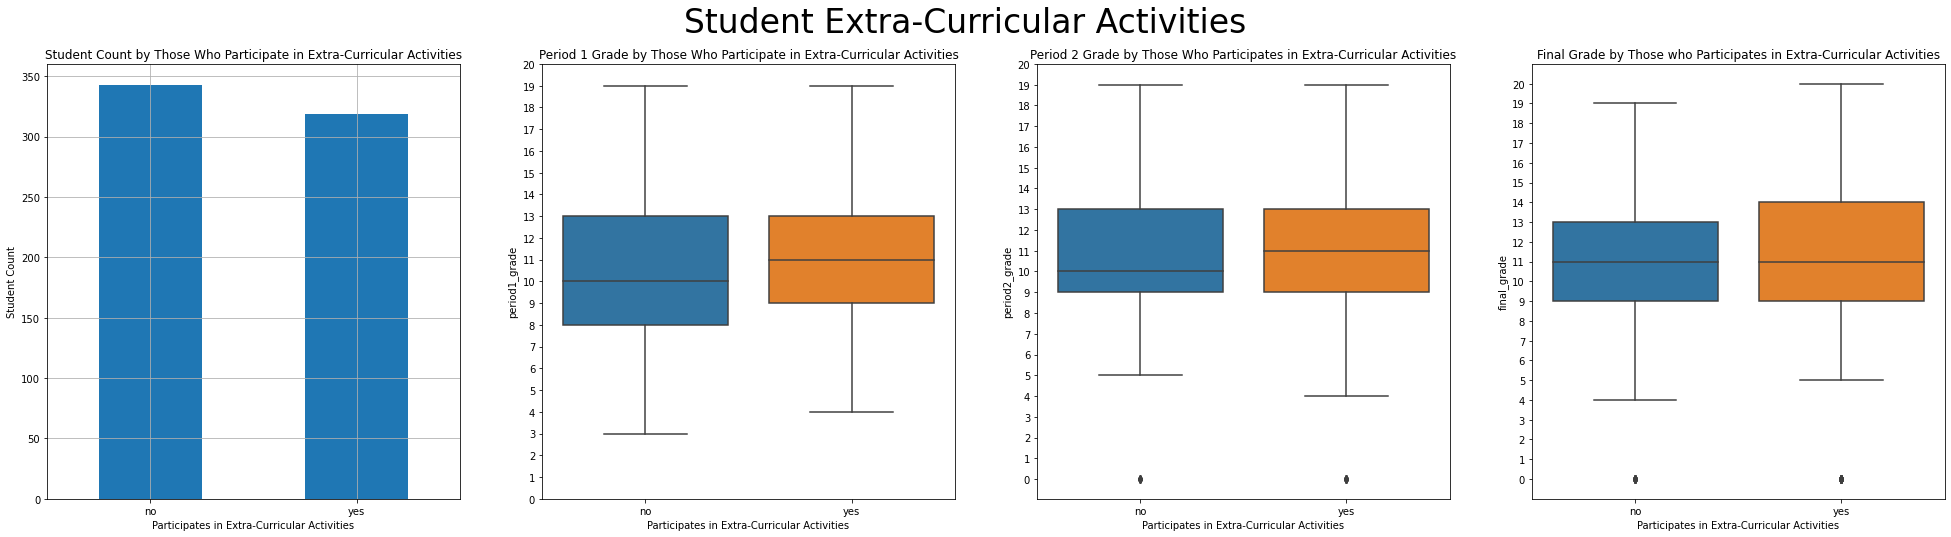

In [55]:
activities = graphs(df, "activities", True, "period1_grade", "period2_grade", "final_grade", (34, 8), "Student Extra-Curricular Activities", 33, 
                    "Participates in Extra-Curricular Activities", "Student Count", "Student Count by Those Who Participate in Extra-Curricular Activities", 
                    "Period 1 Grade by Those Who Participate in Extra-Curricular Activities", "Period 2 Grade by Those Who Participates in Extra-Curricular Activities", 
                    "Final Grade by Those who Participates in Extra-Curricular Activities", "student_activites")

---

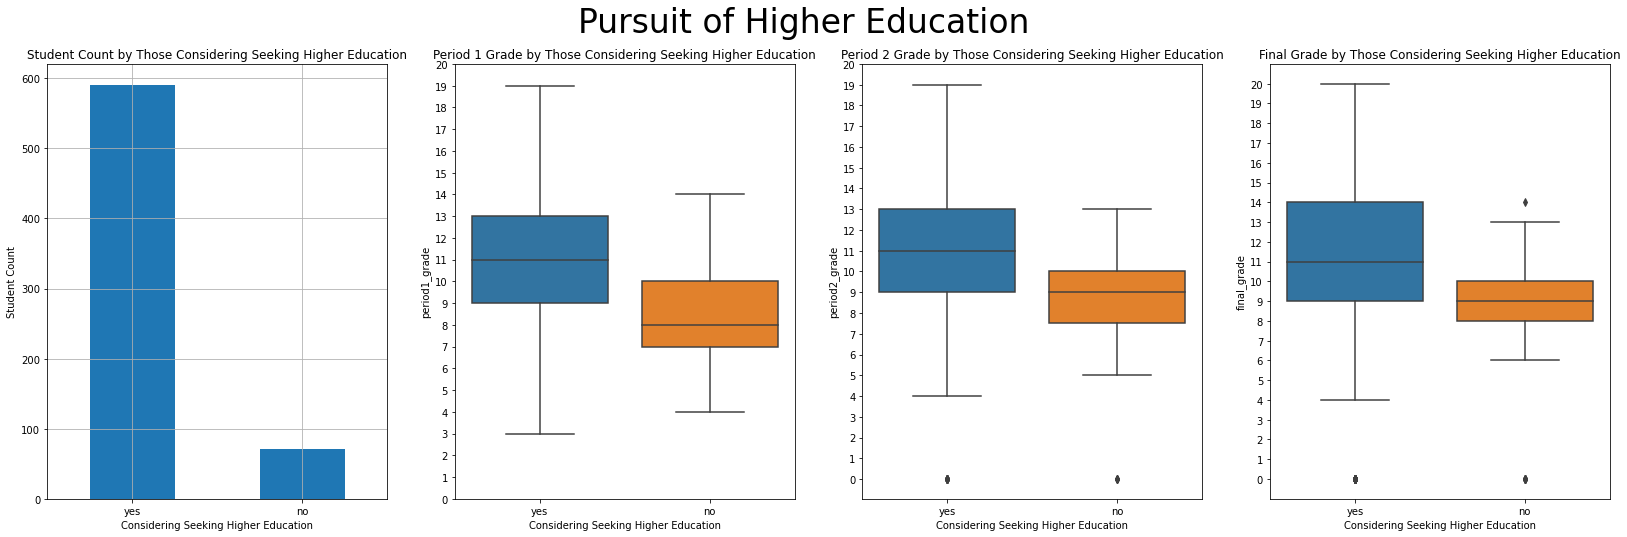

In [56]:
higher_edu = graphs(df, "higher", False, "period1_grade", "period2_grade", "final_grade", (28, 8), "Pursuit of Higher Education", 33, "Considering Seeking Higher Education", 
                    "Student Count", "Student Count by Those Considering Seeking Higher Education", "Period 1 Grade by Those Considering Seeking Higher Education", 
                    "Period 2 Grade by Those Considering Seeking Higher Education", "Final Grade by Those Considering Seeking Higher Education", "student_highereducation")

---

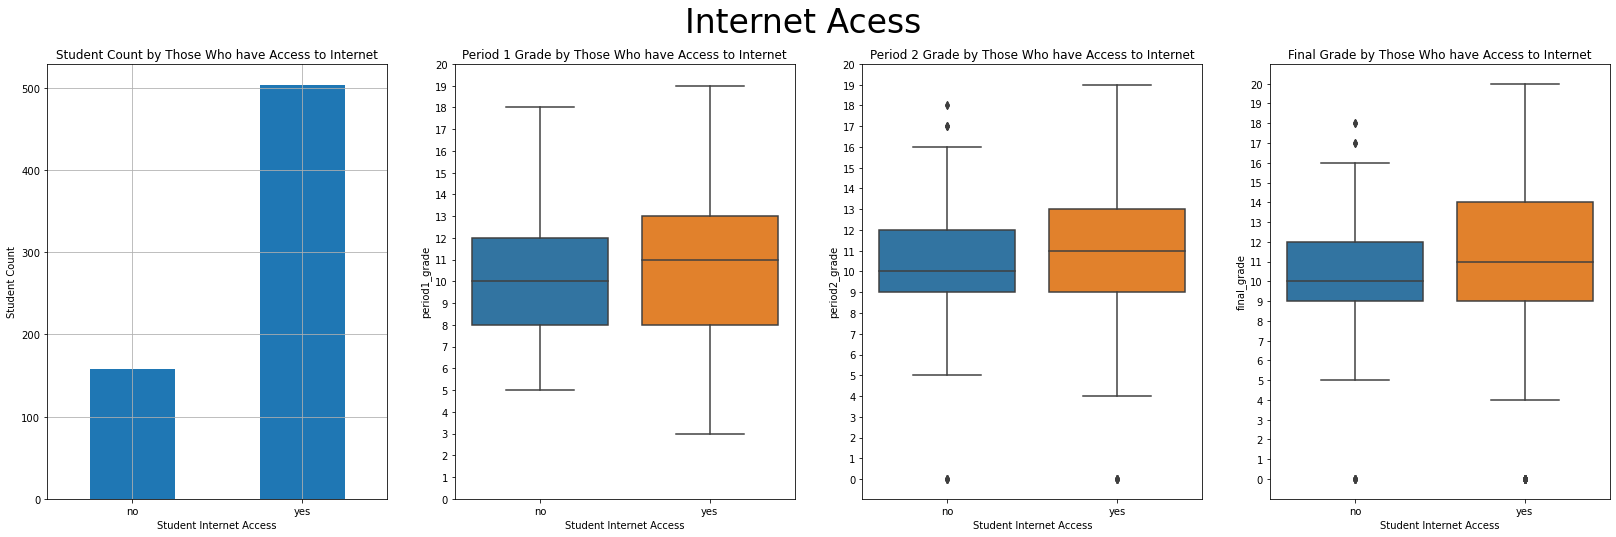

In [57]:
internet_access = graphs(df, "internet", True, "period1_grade", "period2_grade", "final_grade", (28, 8), "Internet Acess", 33, "Student Internet Access", "Student Count", 
                         "Student Count by Those Who have Access to Internet", "Period 1 Grade by Those Who have Access to Internet", 
                         "Period 2 Grade by Those Who have Access to Internet", "Final Grade by Those Who have Access to Internet", "student_internetaccess")

---
**The famrel variable is an ordinal varaiable that ranks students based on the quality of their family relationships. 
From the student.txt file the values go from 1 (representing very bad) to 5 (representing excellent)**   

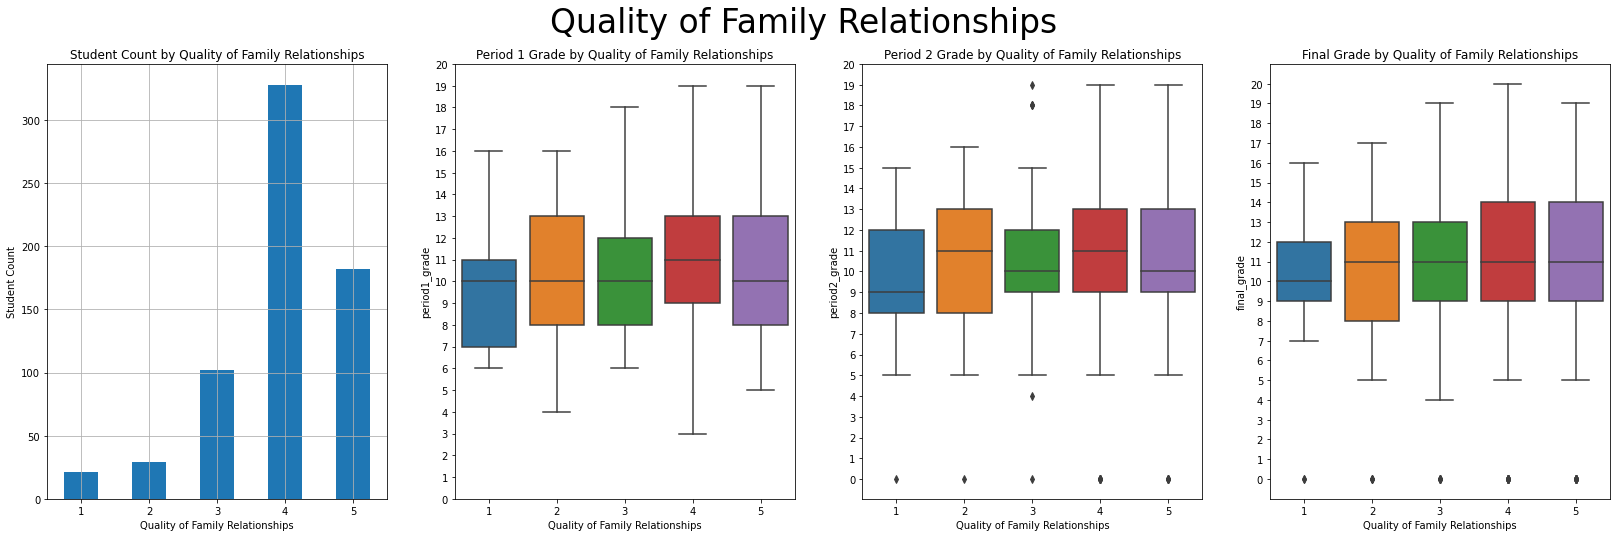

In [58]:
family_relationships = graphs(df, "famrel", True, "period1_grade", "period2_grade", "final_grade", (28, 8), "Quality of Family Relationships", 33, 
                              "Quality of Family Relationships", "Student Count", "Student Count by Quality of Family Relationships", 
                              "Period 1 Grade by Quality of Family Relationships", "Period 2 Grade by Quality of Family Relationships", 
                              "Final Grade by Quality of Family Relationships", "student_familyrelationships")

---
**The freetime variable is an ordinal varaiable that ranks students based on how much free time that a given student had after school. 
From the student.txt file the values go from 1 (representing very low free time) to 5 (representing high free time)**   

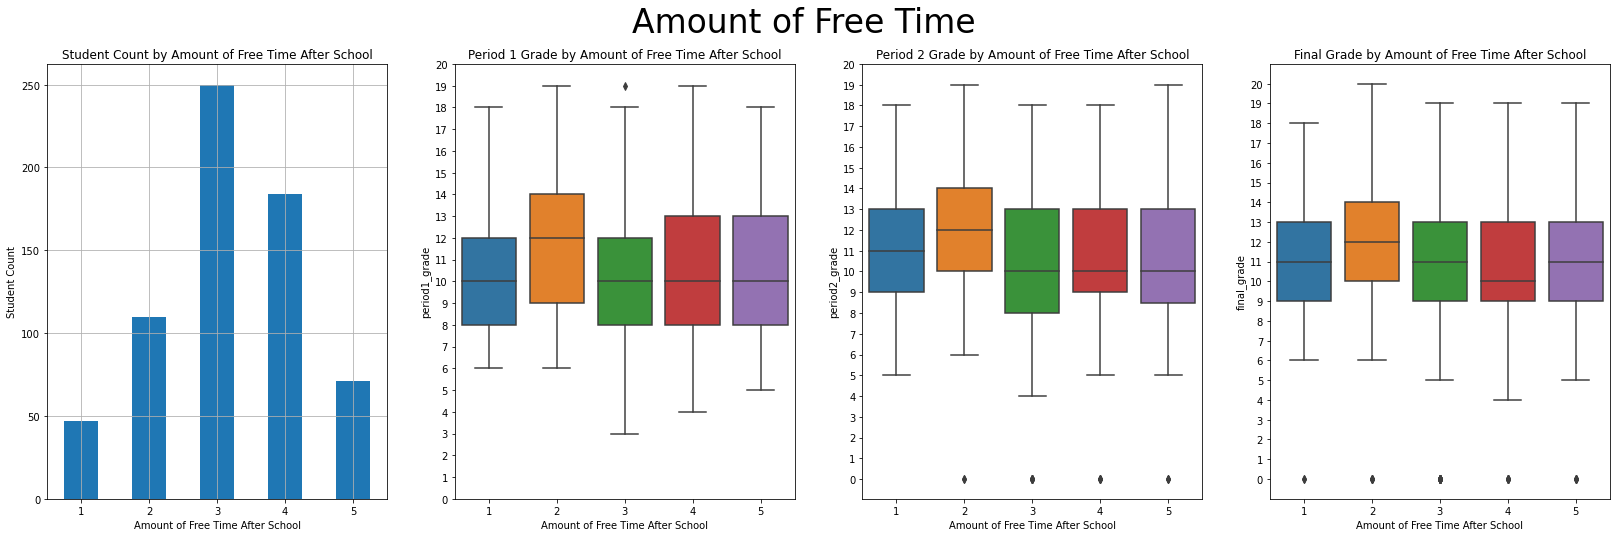

In [59]:
student_freetime = graphs(df, "freetime", True, "period1_grade", "period2_grade", "final_grade", (28, 8), "Amount of Free Time", 33, "Amount of Free Time After School", 
                          "Student Count", "Student Count by Amount of Free Time After School", "Period 1 Grade by Amount of Free Time After School", 
                          "Period 2 Grade by Amount of Free Time After School", "Final Grade by Amount of Free Time After School", "student_freetime")

---
**The goout variable is an ordinal varaiable that ranks students based on the amount of time they spend going on with friends. 
From the student.txt file the values go from 1 (representing very low amounts of time spent going out with friends) to 5 (representing high amounts of time spent going out with friends)**   

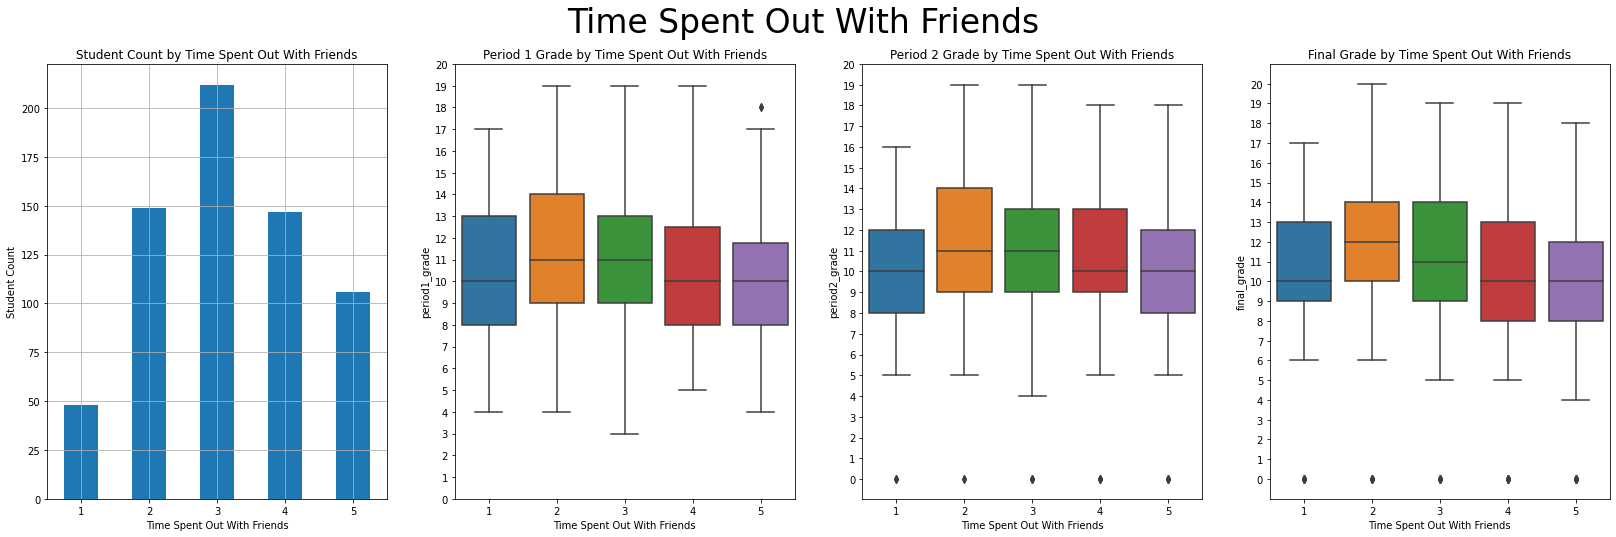

In [60]:
student_timespentout = graphs(df, "goout", True, "period1_grade", "period2_grade", "final_grade", (28, 8), "Time Spent Out With Friends", 33, "Time Spent Out With Friends", 
                              "Student Count", "Student Count by Time Spent Out With Friends", "Period 1 Grade by Time Spent Out With Friends", 
                              "Period 2 Grade by Time Spent Out With Friends", "Final Grade by Time Spent Out With Friends", "student_goout")

---
**The weekday_alc variable is an ordinal varaiable that ranks students based on the amount of alcohol a student consumes during weekdays. 
From the student.txt file the values go from 1 (representing very low alcohol weekday consumption) to 5 (representing very high alcohol weekday consumption)**   

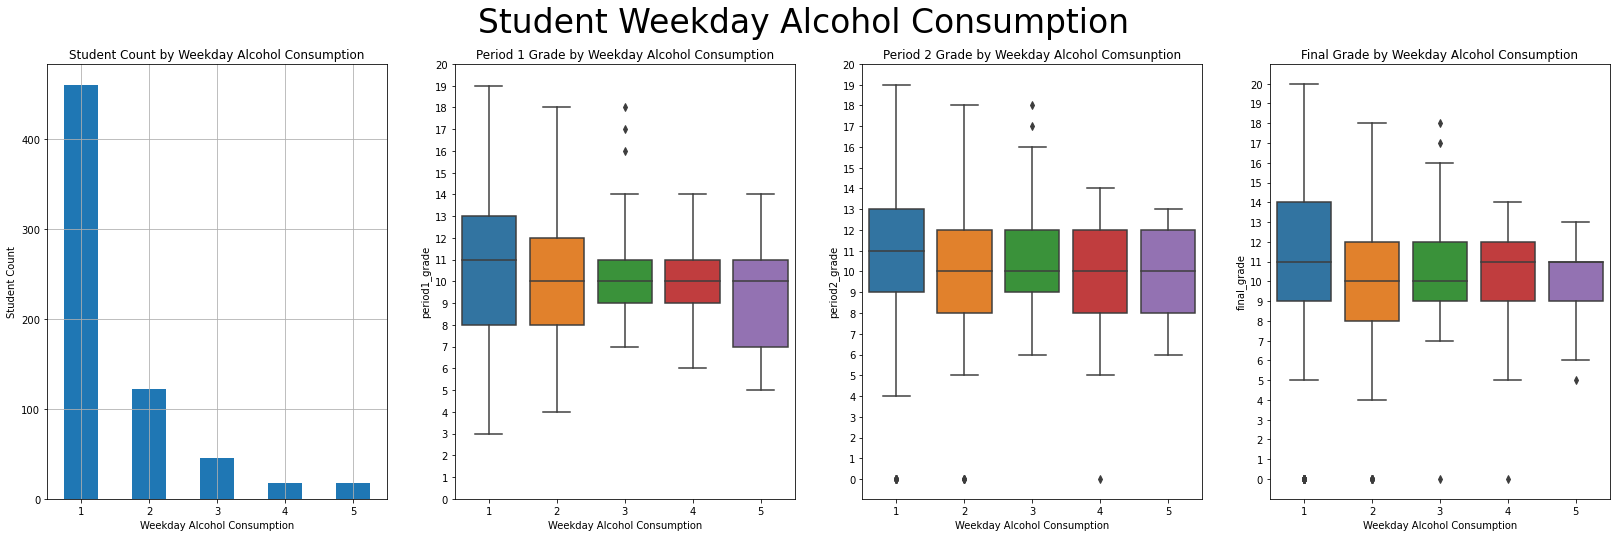

In [66]:
weeday_alcohol = graphs(df, "weekday_alc", True, "period1_grade", "period2_grade", "final_grade", (28, 8), "Student Weekday Alcohol Consumption", 33, 
                        "Weekday Alcohol Consumption", "Student Count", "Student Count by Weekday Alcohol Consumption", "Period 1 Grade by Weekday Alcohol Consumption", 
                        "Period 2 Grade by Weekday Alcohol Comsunption", "Final Grade by Weekday Alcohol Consumption", "student_weekdayalc")

---
**The weekend_alc variable is an ordinal varaiable that ranks students based on the amount of alcohol a student consumes during the weekend. 
From the student.txt file the values go from 1 (representing very low alcohol weekend consumption) to 5 (representing very high alcohol weekend consumption)**   

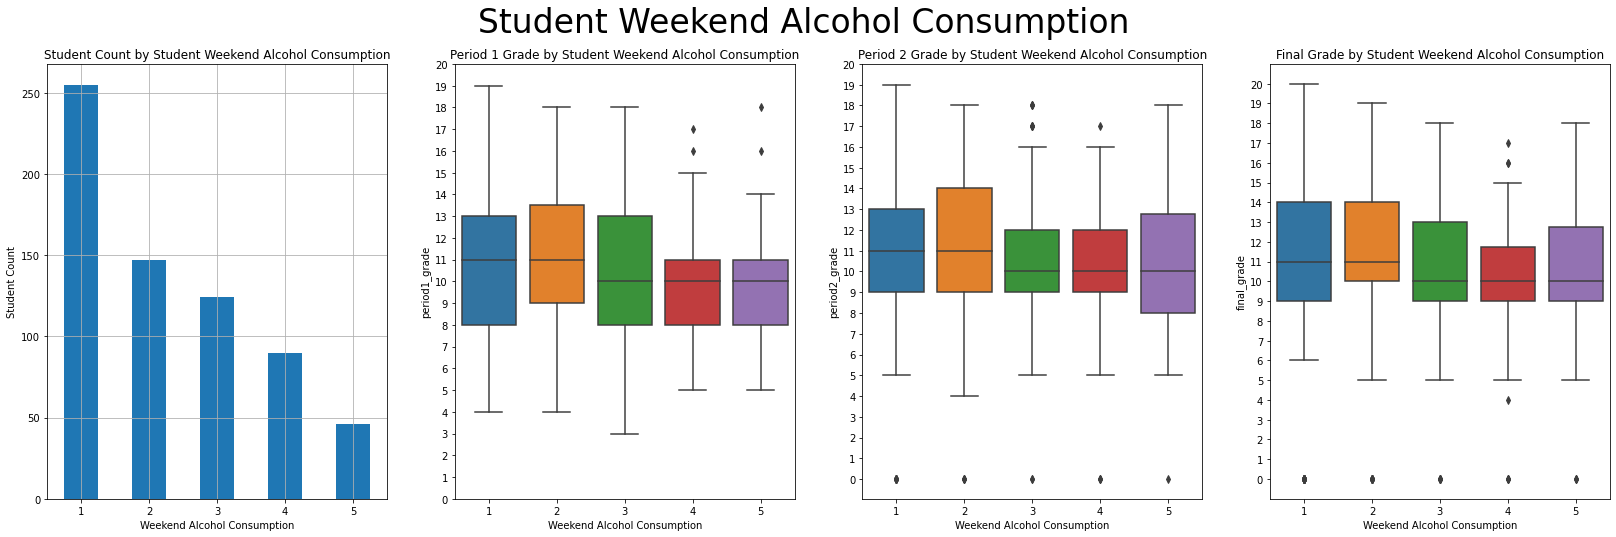

In [62]:
weekend_alcohol = graphs(df, "weekend_alc", True, "period1_grade", "period2_grade", "final_grade", (28, 8), "Student Weekend Alcohol Consumption", 33, 
                         "Weekend Alcohol Consumption", "Student Count", "Student Count by Student Weekend Alcohol Consumption", 
                         "Period 1 Grade by Student Weekend Alcohol Consumption", "Period 2 Grade by Student Weekend Alcohol Consumption", 
                         "Final Grade by Student Weekend Alcohol Consumption", "student_weekendalc")

---
**The health variable is an ordinal varaiable that ranks students based on their current health status.
From the student.txt file the values go from 1 (representing very low bad health) to 5 (representing very good health)**   

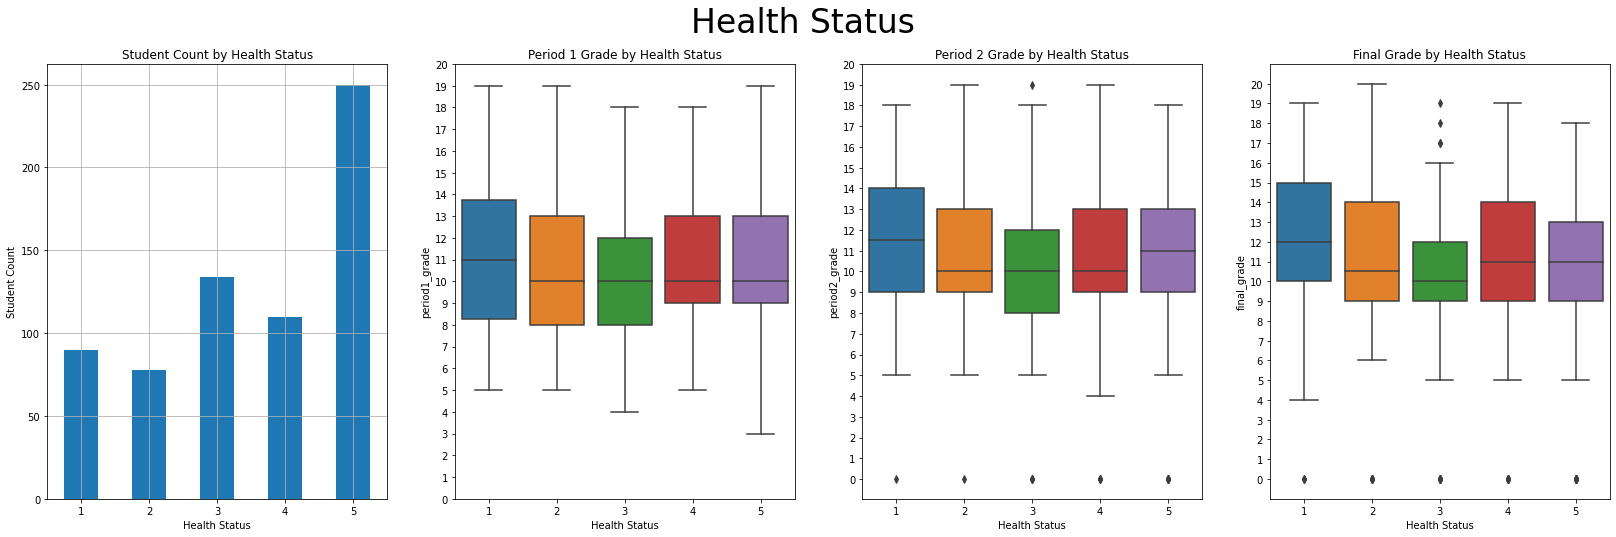

In [63]:
health_status = graphs(df, "health", True, "period1_grade", "period2_grade", "final_grade", (28, 8), "Health Status", 33, "Health Status", "Student Count", 
       "Student Count by Health Status", "Period 1 Grade by Health Status", "Period 2 Grade by Health Status", "Final Grade by Health Status", "health_status")